In [32]:
library(dplyr)
library(stringr)

data1 = read.table('BCR/Bcell1_HC.tab', header = TRUE, sep = '\t', stringsAsFactors = FALSE)
data2 = read.table('BCR/Bcell1_LC.tab', header = TRUE, sep = '\t', stringsAsFactors = FALSE)
data = rbind(data1, data2)

data$BC = substring(data$SEQUENCE_ID, 1, 12)
data$UMI = substring(data$SEQUENCE_ID, 13, 20)
data$LANE_ID = paste0(data$Sample, data$BC)
head(data)

,SEQUENCE_ID,SEQUENCE_INPUT,FUNCTIONAL,IN_FRAME,STOP,MUTATED_INVARIANT,INDELS,LOCUS,V_CALL,D_CALL,...,R2SEQCOUNT,ERROR,LENGTH,OVERLAP,PVAL,Sample,ID,BC,UMI,LANE_ID
,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,...,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,TCGACCCTAGTTGTTGGCGA,NNNNNNNNNNNNNNNNNNNNNNNNNCACTGTCTCTGGTGGCTCCATCAGTAGTTACTACTGGAGCTGGATCCGGCAGCCCCCAGGGAAGGGACTGGAGTGGATTGGGTATATCTATTACAGTGGGAGCACCAACTACAACCCCTCCCTCAAGAGTCGAGTCACCATATCAGTAGACACGTCCAAGAACCAGTTCTCCCTGAAGCTGAGCTCTGTGACCGCCGCAGACACGGCCGTGTATTACTGTGCGAGACTTGCGGTGACAACGAACTCCCCCTACTTTGACTACTGGGGCCAGGGAACGCTGGTCACCGTCTCCTCAGGNNNNNNNNN,TRUE,TRUE,FALSE,NA,FALSE,IGH,IGHV4-59*08,IGHD4-17*01,...,2541,0.0000,331,123,1.1102e-16,B2,B2TCGACCCTAGTTGTTGGCGA,TCGACCCTAGTT,GTTGGCGA,B2TCGACCCTAGTT
2,GGGAAGTGGGGCTCGGGTCG,NNTANTNNNNNTNNTANNNANNANNNTGCAGCCTCTGGATTCACCTTCAGTAGCAATNGCATGANCTGCGTCCGCCAGGCTCCAGGGAAGGTGCTGGAGTGGGTCNCATCNATTNATAACANTGGTAGNTANACATACGACGNANNCTCNNNGAAGGGCTGATACTCCTACTACAGAAAGGACGCCTAGAACCCACGGTCCCCGGTAACCATCTGCTCAAGNGCNNNNNN,FALSE,FALSE,TRUE,NA,FALSE,IGH,"IGHV3-21*01,IGHV3-21*02,IGHV3-21*03","IGHD2-2*01,IGHD2-2*02,IGHD2-2*03",...,8,0.1786,230,224,1.1102e-16,B2,B2GGGAAGTGGGGCTCGGGTCG,GGGAAGTGGGGC,TCGGGTCG,B2GGGAAGTGGGGC
3,CCTGAGAAGTGGGGTTTTTT,NNNNNNNNNNNNNNNNNNNNNNNNNTGCAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGANCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGCTATTAGTGGTAGTGGTGGTAGCACATACTACGCAGACTCCGTGAAGGGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGGGGGGGACTGGGACCGCCTACTACTACTACGGTATGGACGTCTGGGGCCAAGGGACCACGGTCACCGTCTCCTCAGNNNNNNNNNN,TRUE,TRUE,FALSE,NA,FALSE,IGH,"IGHV3-23*01,IGHV3-23*04,IGHV3-23D*01","IGHD3/OR15-3a*01,IGHD3/OR15-3b*01",...,832,0.0000,337,117,1.1102e-16,B2,B2CCTGAGAAGTGGGGTTTTTT,CCTGAGAAGTGG,GGTTTTTT,B2CCTGAGAAGTGG
4,GTTTTGTCATGCGCGGGCCG,NNNNNNNNNNNNNNNNNNNNNNNNNCACTGTCTCTGGTGGCTCCATCAGCAGTGGTGATTACTACTGGAGCTGGATCCGCCAGCCCCCAGGGAAGGGCCTGGAGTGGATTGGGTACATCTATTACAGTGGGAGCACCTACTACAACCCGTCCCTCAAGAGTCGAGTTACCATATCAGTAGACACGTCCAAGAACCAGTTCTCCCTGAAGCTGAGCTCTGTGACTGCCGCAGACACGGCCGTGTATTACTGTGCCAGAGGTTGCCCCTTTTATTACGATATTTTGACTGGTTATTATTCCCGGTACTACTTTGACTACTGGGGCCAGGGAACGCTGGTCACCGTCTCCTCAGNNNNNNNNNN,TRUE,TRUE,FALSE,NA,FALSE,IGH,IGHV4-30-4*08,IGHD3-9*01,...,2229,0.0000,361,93,1.1102e-16,B2,B2GTTTTGTCATGCGCGGGCCG,GTTTTGTCATGC,GCGGGCCG,B2GTTTTGTCATGC
5,GTATCTAGCTATCCGTGTTC,NNNNNNNNNNNNNNNNNNNNNNNNNGCTTCTGGATACACCTTCACCAGTTATGATATCAACTGGGTGCGACAGGCCACTGGACAAGGGCTTGAGTGGATGGGATGGATGAACCCTAACAGTGGTAACACAGGCTATGCACAGAAGTTCCAGGGCAGAGTCACCATGACCAGGAACACCTCCATAAGCACAGCCTACATGGAGCTGAGCAGCCTGAGATCTGAGGACACGGCCGTGTATTACTGTGCGAGAGGCCGCCAGGGAGATTGTACTGGTGGTGTATGCTATTATAATATCTGGGGCCAAGGGACAATGGTCACCGTCTCTTCAGNNNNNNNNNN,TRUE,TRUE,FALSE,NA,FALSE,IGH,IGHV1-8*01,IGHD2-8*02,...,25965,0.0000,339,115,1.1102e-16,B2,B2GTATCTAGCTATCCGTGTTC,GTATCTAGCTAT,CCGTGTTC,B2GTATCTAGCTAT
6,TGCACACCGAAGGGGTCTAA,NNNNNNNNNNNNNNNNNNNNNNNTGTGCAGCCTCTGGATTCACCGTTGGCAACTATGGCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGCTATCAGTGGTGGTGCTGAAAGCACATACTACGCAGACTCCGTGAAGGGCCAATTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTTTTTGCAAATGAACAACCTGGGAGCCGAGGACACGGCCGTATATTACTGTGCCAAAGATAGCCCAGTACTCACCGTCTGGGGCCAAGGGACTATGGTCACCGTCTCCTCAGNNNNNNNNNN,TRUE,TRUE,FALSE,NA,FALSE,IGH,"IGHV3-23*01,IGHV3-23*04,IGHV3-23D*01","IGHD2/OR15-2a*01,IGHD2/OR15-2b*01",...,1804,0.0000,319,135,1.1102e-16,B2,B2TGCACACCGAAGGGGTCTAA,TGCACACCGAAG,GGGTCTAA,B2TGCACACCGAAG


In [33]:
# trim masked primer sequences
library(stringr)
data$SEQUENCE_TRIM = data$SEQUENCE_INPUT
for (i in 1:dim(data)[1]) {
    vstart = data$V_SEQ_START[i]
    len = str_length(data$SEQUENCE_TRIM[i])
    data$SEQUENCE_TRIM[i] = substring(data$SEQUENCE_TRIM[i], vstart, len) 
    
    jlen = data$J_SEQ_LENGTH[i]
    jstart = data$J_SEQ_START[i]
    len = str_length(data$SEQUENCE_INPUT[i])
    data$SEQUENCE_TRIM[i] = substring(data$SEQUENCE_TRIM[i], 1,jstart - vstart + jlen)
}


In [34]:

data$N_count = str_count(data$SEQUENCE_TRIM, 'N')
data$N_frac = data$N_count / length(data$SEQUENCE_TRIM)
summary(data$N_count)
saveRDS(data, 'BCR/curr_data.RDS')

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.00   11.00   21.11   39.00  110.00  281453 

In [1]:
data = readRDS('BCR/curr_data.RDS')

In [2]:
seurat = readRDS('initialseurat_bcell1.RDS')

In [3]:
seurat$orig[seurat$orig == 'BCell1'] = 'B1'
seurat$orig[seurat$orig == 'PBMC1'] = 'B2'
seurat$orig[seurat$orig == 'BCell2'] = 'B3'
seurat$orig[seurat$orig == 'PBMC2'] = 'B4'
seurat$orig[seurat$orig == 'BCell3'] = 'B5'
seurat$orig[seurat$orig == 'PBMC3'] = 'B6'
seurat$orig[seurat$orig == 'BCell4'] = 'B7'
seurat$orig[seurat$orig == 'PBMC4'] = 'B8'
table(seurat$orig)


  B1   B2   B3   B4   B5   B6   B7   B8 
2803 2632 2511 4506 4967 2682 2797 1908 

In [6]:
library(dplyr)
library(ggplot2)
library(stringr)


In [7]:
library(ggplot2)
seurat$id = paste0(seurat$orig, seurat$bc)

matches = data %>% filter(LANE_ID %in% seurat@meta.data$id, N_count < 4, CDR3_IMGT != '', CDR1_IMGT != '', str_length(SEQUENCE_TRIM) > 100)#, R1CONSCOUNT > 5)
unmatched =  data %>% filter(Sample != 'Undetermined', !LANE_ID %in% seurat@meta.data$id, R1CONSCOUNT > 5, N_count < 4, CDR3_IMGT != '', CDR1_IMGT != '' , str_length(SEQUENCE_TRIM) > 100)
dim(unmatched)


[1] 104512     71

In [ ]:

library(stringdist)

for (curr_sample in unique(unmatched$Sample)) {
    message(curr_sample)
    sample_bc = seurat$bc[seurat$orig == curr_sample]
    curr_unmatched = unmatched %>% filter(Sample == curr_sample)
    ham_mat = stringdistmatrix(curr_unmatched$BC, sample_bc)
    curr_unmatched$mindist = apply(ham_mat, 1, min)
    curr_unmatched$nearestBC = seurat$bc[apply(ham_mat, 1, which.min)]

    curr_unmatched = curr_unmatched %>% filter(mindist == 1) %>% mutate(LANE_ID = paste0(Sample, BC))
    print(dim(curr_unmatched))
    matches = rbind(curr_unmatched[,colnames(matches)], matches)
    print(dim(matches))

    }

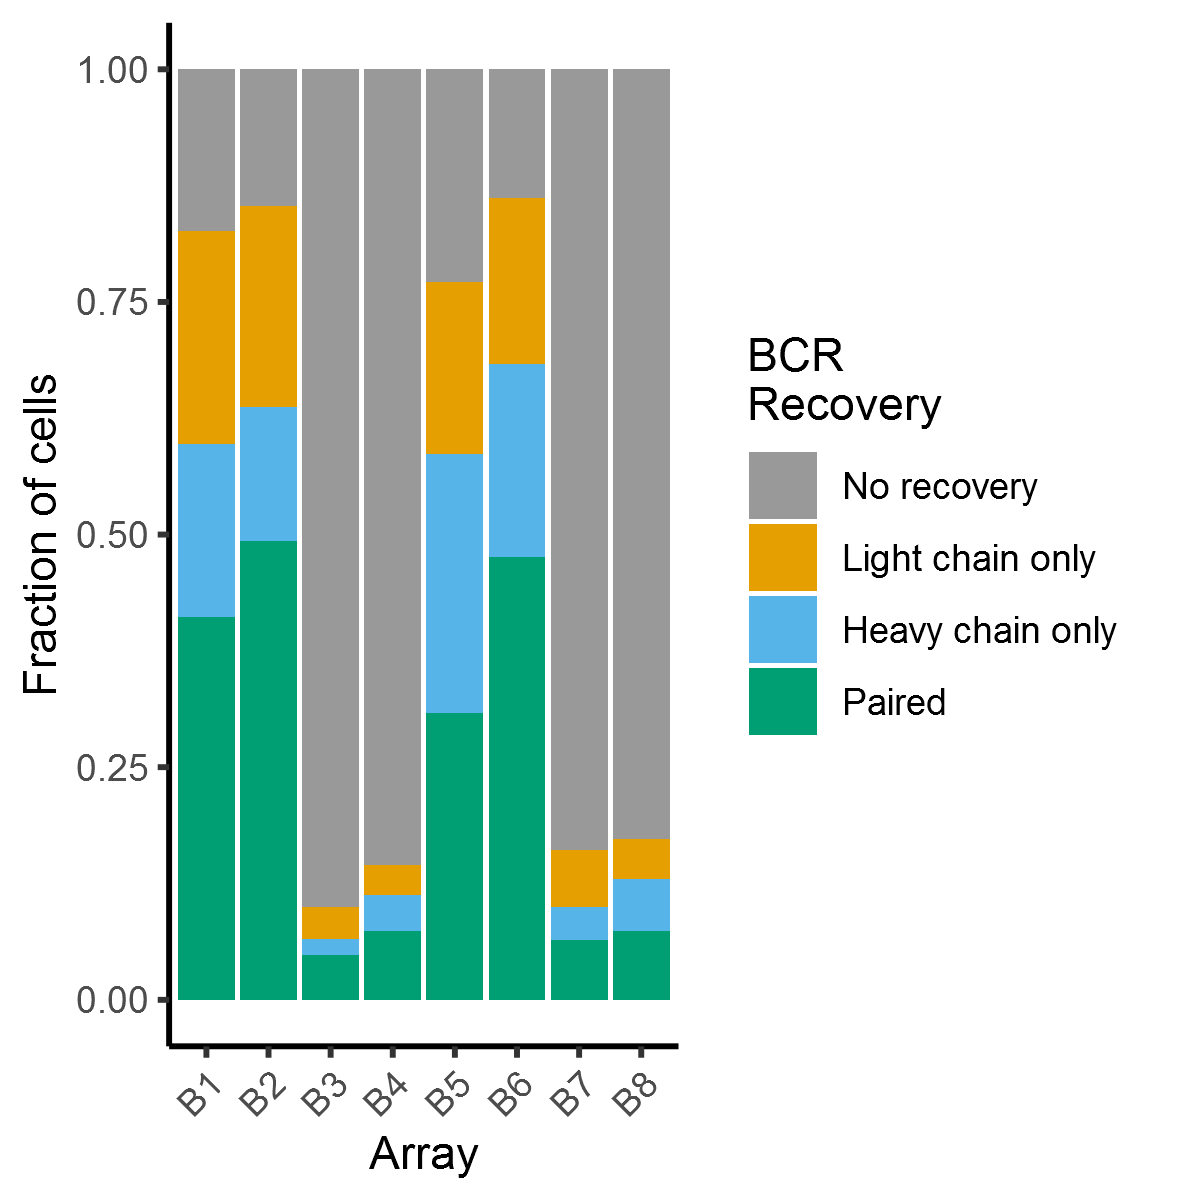

In [24]:
library(ggplot2)
seurat@meta.data$id = paste0(seurat@meta.data$orig, seurat@meta.data$bc)
hc = matches %>% filter(LOCUS == 'IGH') %>% filter(N_count < 5, FUNCTIONAL, R2CONSCOUNT > 25)
lc = matches %>% filter(LOCUS != 'IGH') %>% filter(N_count < 5
                                                   , FUNCTIONAL, R2CONSCOUNT >10)


seurat@meta.data$IGH_recovery = as.numeric(seurat@meta.data$id %in% hc$LANE_ID)
seurat@meta.data$IGL_recovery = as.numeric(seurat@meta.data$id %in% lc$LANE_ID) 

seurat@meta.data$letter = substring(seurat@meta.data$orig, 1, 2)

seurat@meta.data$recovery = 2*seurat@meta.data$IGH_recovery + seurat@meta.data$IGL_recovery
cbp1 <- c("#999999", "#E69F00", "#56B4E9", "#009E73",
          "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
options(repr.plot.res = 300, repr.plot.height = 4, repr.plot.width =4 )
ggplot(seurat@meta.data %>% filter(n_genes > 200), aes(x = orig, fill = factor(recovery))) + geom_bar(position = 'fill') + scale_fill_manual(labels = c('No recovery','Light chain only', 'Heavy chain only', 'Paired'), values = cbp1) + 
labs(x = 'Array', y = 'Fraction of cells', fill = 'BCR\nRecovery') + theme_classic()+ theme(axis.text.x = element_text(angle = 45, hjust = 1)) 

In [25]:
write.table(hc, 'hc.tab', sep= '\t', quote = FALSE, row.names = FALSE)
system('python ../BCRProcess/call_seq_consensus.py hc.tab hc_consensus.tab')

write.table(lc, 'lc.tab', sep= '\t', quote = FALSE, row.names = FALSE)
system('python ../BCRProcess/call_seq_consensus.py lc.tab lc_consensus.tab')


[1] 0

[1] 0

In [26]:
cell_consensus_hc = read.table('hc_consensus.tab', stringsAsFactors = FALSE, sep = '\t', header = TRUE) %>% 
group_by(LANE_ID, Sample, BC) %>% filter(ERRORDIST < 10) %>% mutate(IgM = sum(ISOTYPE == 'IGHM'), IgG = sum(ISOTYPE == 'IGHG1/2'), IgA = sum(ISOTYPE == 'IGHA'), 
                                                                    IgD = sum(ISOTYPE == 'IGHD')) %>% 
                                                                    arrange((ERRORDIST),desc( R2CONSCOUNT)) %>% slice(1) #%>% summarize(n = n())
head(cell_consensus_hc)

cell_consensus_lc = read.table('lc_consensus.tab', stringsAsFactors = FALSE, sep = '\t', header = TRUE) %>% 
group_by(LANE_ID, Sample, BC) %>% arrange((ERRORDIST), desc(R2CONSCOUNT)) %>% slice(1) #%>% summarize(n = n())
#head(cell_consensus_lc)

SEQUENCE_ID,SEQUENCE_INPUT,FUNCTIONAL,IN_FRAME,STOP,MUTATED_INVARIANT,INDELS,LOCUS,V_CALL,D_CALL,...,N_count,N_frac,CONSENSUS_SEQUENCE,CONSENSUS_SEQCOUNT,ERRORDIST,CONSENSUS_AMBIG,IgM,IgG,IgA,IgD
<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,...,<int>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AAAAGAGCTAGTCGGGGGGT,NNNNNNNNNNNNNNNNNNNNNNNNNTGCAGTCTCTGGATTCACCTTCAGTACCTATACGATGAACTGGGTCCGCCAGGCTCCAGGGAAGGGACTGGAGTGGGTCTCATCAATTAACAGTAATGGTAGGTTCATCTACTACGCAGACTCAGTAAAGGGCCGATTCACCATCTCCAGAGACAACGCCAAGAGCTCACTGTATCTGCACATGAAAACCCTGCGAGTCGAGGACACAGCTGTATATTACTGTGCGAGAGATACTTCGGTTGACTACTGGGGCCAGGGAACCCTGGTCACCGACTCCTCAGCCAGNNNNNNNNNN,True,True,False,NA,False,IGH,IGHV3-21*03,"IGHD2/OR15-2a*01,IGHD2/OR15-2b*01,IGHD3-10*01",...,0,0.000000e+00,AGTCTCTGGATTCACCTTC............AGTACCTATACGATGAACTGGGTCCGCCAGGCTCCAGGGAAGGGACTGGAGTGGGTCTCATCAATTAACAGTAAT......GGTAGGTTCATCTACTACGCAGACTCAGTAAAG...GGCCGATTCACCATCTCCAGAGACAACGCCAAGAGCTCACTGTATCTGCACATGAAAACCCTGCGAGTCGAGGACACAGCTGTATATTACTGTGCGAGAGATACTTCGGTTGACTACTGGGGCCAGGGAACCCTGGTCACCGACTCCTCAG,2,0,0,0,2,0,0
AAAAGGTTCTACAAAGGCGC,NNNNNNNNNNNNNNNNNNNNNNNTCAAGGGTTCTGGATACAGCTTTACCAGCTACTGGATCGGCTGGGTGCGCCAGATGCCCGGGAAAGGCCTGGAGTGGATGGGGATCATCTATCCTGGTGACTCTGATACCAGATACAGCCCGTCCTTCCAAGGCCAGGTCACCATCTCAGCCGACAAGTCCATCAGCACCGCCTACCTGCAGTGGAGCAGCCTGAAGGCCTCGGACACCGCCATGTATTACTGTGCGAGGAGGTATAGCAGTGGCTGGTACTCGGGGGAAGAATACTTCCAGCACTGGGGCCAGGGCACCCTGGTCACCGTCTCCTCAGGNNNNNNNNN,True,True,False,NA,False,IGH,"IGHV5-51*01,IGHV5-51*03",IGHD6-19*01,...,0,0.000000e+00,GGGTTCTGGATACAGCTTT............ACCAGCTACTGGATCGGCTGGGTGCGCCAGATGCCCGGGAAAGGCCTGGAGTGGATGGGGATCATCTATCCTGGT......GACTCTGATACCAGATACAGCCCGTCCTTCCAA...GGCCAGGTCACCATCTCAGCCGACAAGTCCATCAGCACCGCCTACCTGCAGTGGAGCAGCCTGAAGGCCTCGGACACCGCCATGTATTACTGTGCGAGGAGGTATAGCAGTGGCTGGTACTCGGGGGAAGAATACTTCCAGCACTGGGGCCAGGGCACCCTGGTCACCGTCTCCTCAG,1,0,0,1,0,0,0
AAACACCATAGGGCCGGGGG,NNNNNNNNNNNNNNNNNNNNNNNNNTGCAGCCTCTGGATTCACCTTTAGTAGCTATTGGATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTGGCCAACATAAAGCAAGATGGAAGTGAGAAATACTATGTGGACTCTGTGAAGGGCCGATTCACCATCTCCAGAGACAACGCCAAGAACTCACTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCTGTGTATTACTGTGCGAGAGATTCGTGGGATATAGTGGCTACGTCCCAATGGGGGTTTGACTACTGGGGCCAGGGAACGCTGGTCACCGTCTCCTCAGGNNNNNNNNN,True,True,False,NA,False,IGH,IGHV3-7*01,IGHD5-12*01,...,0,0.000000e+00,AGCCTCTGGATTCACCTTT............AGTAGCTATTGGATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTGGCCAACATAAAGCAAGAT......GGAAGTGAGAAATACTATGTGGACTCTGTGAAG...GGCCGATTCACCATCTCCAGAGACAACGCCAAGAACTCACTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCTGTGTATTACTGTGCGAGAGATTCGTGGGATATAGTGGCTACGTCCCAATGGGGGTTTGACTACTGGGGCCAGGGAACGCTGGTCACCGTCTCCTCAG,4,0,0,3,0,0,1
AAACCCCGTACTATTGCGAC,NNNNNNNNNNNNNNNNNNNNNNNNNTGCAGCGTCTAAATTCACCTTCAGTAGCTATGGCATGCATTGNGTCCGCCAGGCTCCAGGCAAGGGGCTGGAGTGGGTGGCATTTTTACGGTATGATGGAAGTAATAAATATTATGCAGACTCCGTGAAGGGCCGATTCACCATCTCCAGAGACAACTCCAAGAACACCCTGTATTTGCAAATGAACAGCCTGAGAGCTGAGGACACGGCTGTGTATTACTGTGCCCGGACCTCGGGGGAGTTACTAAGTTACTACTACGGTATGGACGTCTGGGGCCAAGGGACCACGGTCACCGTCTCCTCAGGNNNNNNNNN,True,True,False,NA,False,IGH,"IGHV3-30*02,IGHV3-30-5*02","IGHD3-16*01,IGHD3-16*02,IGHD3-16*03",...,1,1.380607e-06,AGCGTCTAAATTCACCTTC............AGTAGCTATGGCATGCATTGNGTCCGCCAGGCTCCAGGCAAGGGGCTGGAGTGGGTGGCATTTTTACGGTATGAT......GGAAGTAATAAATATTATGCAGACTCCGTGAAG...GGCCGATTCACCATCTCCAGAGACAACTCCAAGAACACCCTGTATTTGCAAATGAACAGCCTGAGAGCTGAGGACACGGCTGTGTATTACTGTGCCCGGACCTCGGGGGAGTTACTAAGTTACTACTACGGTATGGACGTCTGGGGCCAAGGGACCACGGTCACCGTCTCCTCA,1,0,1,0,0,0,1
AAACCGTTGGCTACCTTGAT,NNNNNNNNNNNNNNNNNNNNNNNNNTGCAGCCTCTGGATTCACCTTCAGTAGTTATGAAATGAACTGNGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTTTCATACATTAGTAGTAGTGGTAGTACCATATACTACGCAGACTCTGTGAAGGGCCGATTCACCATCTCCAGAGACAACGCCAAGAACTCACTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCTGTTTATTACTGTGCGAGAGATGCATCAAGATATTGTAGTGGTGGTAGCTGCTACGCGTTCGACTACTACTACGGTATGGACGTCTGGGGCCAAGGGACCACGGTCACCGTCTCCTCAGNNNNNNNNNN,True,True,False,NA,False,IGH,IGHV3-48*03,IGHD2-15*01,...,1,1.380607e-06,AGCCTCTGGATTCACCTTC............AGTAGTTATGAAATGAACTGNGTCCGCCAGGCTCCAGGGAAGGGGC

In [27]:
library(alakazam)
library(stringr)
cell_consensus_hc[,c('FWR1nuc', 'CDR1nuc', 'FWR2nuc', 'CDR2nuc', 'FWR3nuc')]= extractVRegion(cell_consensus_hc$CONSENSUS_SEQUENCE, region = c('fwr1', 'cdr1', 'fwr2', 'cdr2', 'fwr3')) %>% as.data.frame()
cell_consensus_hc$JUNCTION_START = NA
cell_consensus_hc$CDR3nuc = NA
dim(cell_consensus_hc)
cell_consensus_hc = cell_consensus_hc %>% filter(FWR3nuc != '')

dim(cell_consensus_hc)
for (i in 1:nrow(cell_consensus_hc)) {
    cell_consensus_hc$JUNCTION_START[i] = as.numeric(gregexpr(cell_consensus_hc$CONSENSUS_SEQUENCE[i], pattern = cell_consensus_hc$FWR3nuc[i])) + str_length(cell_consensus_hc$FWR3nuc[i])-3
    cell_consensus_hc$CDR3nuc[i] = substring(cell_consensus_hc$CONSENSUS_SEQUENCE[i], cell_consensus_hc$JUNCTION_START[i], cell_consensus_hc$JUNCTION_START[i] + str_length(cell_consensus_hc$JUNCTION[i]) -1)
}

cell_consensus_lc[,c('FWR1nuc', 'CDR1nuc', 'FWR2nuc', 'CDR2nuc', 'FWR3nuc')]= extractVRegion(cell_consensus_lc$CONSENSUS_SEQUENCE, region = c('fwr1', 'cdr1', 'fwr2', 'cdr2', 'fwr3')) %>% as.data.frame()
cell_consensus_lc = cell_consensus_lc %>% filter(FWR3nuc != '')

cell_consensus_lc$JUNCTION_START = NA
cell_consensus_lc$CDR3nuc = NA

for (i in 1:nrow(cell_consensus_lc)) {
    cell_consensus_lc$JUNCTION_START[i] = as.numeric(gregexpr(cell_consensus_lc$CONSENSUS_SEQUENCE[i], pattern = cell_consensus_lc$FWR3nuc[i])) + str_length(cell_consensus_lc$FWR3nuc[i])-3
    cell_consensus_lc$CDR3nuc[i] = substring(cell_consensus_lc$CONSENSUS_SEQUENCE[i], cell_consensus_lc$JUNCTION_START[i], cell_consensus_lc$JUNCTION_START[i] + str_length(cell_consensus_lc$JUNCTION[i]) -1)
}




Warning message:
"package 'alakazam' was built under R version 4.1.3"
As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.



[1] 9284   86

[1] 9284   86

In [28]:
library(alakazam)

cell_consensus_hc$CDR1 = translateDNA(cell_consensus_hc$CDR1nuc)
cell_consensus_lc$CDR1 = translateDNA(cell_consensus_lc$CDR1nuc)

cell_consensus_hc$CDR3 = translateDNA(cell_consensus_hc$CDR3nuc)
cell_consensus_lc$CDR3 = translateDNA(cell_consensus_lc$CDR3nuc)

cell_consensus_hc$CDR2 = translateDNA(cell_consensus_hc$CDR2nuc)
cell_consensus_lc$CDR2 = translateDNA(cell_consensus_lc$CDR2nuc)


In [29]:
a = cell_consensus_hc  %>% mutate(JUNCTION = CDR3nuc, JUNCTION_LENGTH = str_length(JUNCTION))# filter(str_length(JUNCTION) == str_length(CDR3nuc)) 
write.table(a, paste0('C:/Users/dmorgan/IgPhyMl/', 'BM2', '.tab'), quote = FALSE, row.names = FALSE, sep = '\t')


In [79]:
files = paste0('C:/Users/dmorgan/IgPhyMl/', 'BM2_clone-pass_germ-pass.tab')
for (curr in files) {
   if (curr == files[1]) {
       df = read.table(curr, stringsAsFactors = FALSE, header = TRUE, sep = '\t')
   } 
   else {
       df = rbind(df, read.table(curr, stringsAsFactors = FALSE, header = TRUE, sep = '\t'))
   }    
}

df$CLONE = paste0('BM2', df$CLONE)
seurat$CLONE = df$CLONE[match(seurat$id, df$LANE_ID)]

In [80]:
tab = table(seurat$CLONE)
tab[order(tab, decreasing = TRUE)] %>% head()


BM27842  BM2571 BM21992 BM27203  BM2996 BM22626 
     11      10       8       8       7       6 

In [81]:
library(shazam)
cell_consensus_hc = observedMutations(df, sequenceColumn = 'CONSENSUS_SEQUENCE', germlineColumn = 'GERMLINE_SEQUENCE_D_MASK', 
                                      frequency = TRUE) %>% mutate(MU_FREQ_TOTAL = mu_freq_seq_r + mu_freq_seq_s) %>% as.data.frame()
cell_consensus_lc = observedMutations(cell_consensus_lc, sequenceColumn = 'CONSENSUS_SEQUENCE', germlineColumn = 'GERMLINE_IMGT', 
                                      frequency = TRUE) %>% mutate(MU_FREQ_TOTAL = mu_freq_seq_r + mu_freq_seq_s)  %>% as.data.frame()

In [82]:
                               

seurat@meta.data$ISOTYPE = cell_consensus_hc[seurat@meta.data$id, 'ISOTYPE']                   
seurat@meta.data$ISOTYPEL = cell_consensus_lc[seurat@meta.data$id, 'ISOTYPE']                   


In [83]:
rownames(cell_consensus_hc) = cell_consensus_hc$LANE_ID
rownames(cell_consensus_lc) = cell_consensus_lc$LANE_ID


seurat@meta.data$IGHV = cell_consensus_hc[seurat@meta.data$id, 'V_CALL']
seurat@meta.data$IGHV = sapply(seurat@meta.data$IGHV, function(x) str_split(x, ',')[[1]][1])
seurat@meta.data$IGLV = cell_consensus_lc[seurat@meta.data$id, 'V_CALL']
seurat@meta.data$IGLV = sapply(seurat@meta.data$IGLV, function(x) str_split(x, ',')[[1]][1])
seurat@meta.data$IGHJ = cell_consensus_hc[seurat@meta.data$id, 'J_CALL']
seurat@meta.data$IGHJ = sapply(seurat@meta.data$IGHJ, function(x) str_split(x, ',')[[1]][1])                         
seurat@meta.data$IGH_MU_FREQ = cell_consensus_hc[seurat@meta.data$id, 'MU_FREQ_TOTAL']                   
head(seurat@meta.data)                    
seurat@meta.data$IGH_CDR3 = cell_consensus_hc[seurat@meta.data$id, 'CDR3']                               
seurat@meta.data$IGL_CDR3 = cell_consensus_lc[seurat@meta.data$id, 'CDR3']                               
seurat@meta.data$IGH_CDR3_nuc = cell_consensus_hc[seurat@meta.data$id, 'CDR3_IMGT']                               
seurat@meta.data$IGL_CDR3_nuc = cell_consensus_lc[seurat@meta.data$id, 'CDR3_IMGT']  
seurat@meta.data$IGL_MU_FREQ = cell_consensus_lc[seurat@meta.data$id, 'MU_FREQ_TOTAL']                   
                               
seurat@meta.data$IGH_CDR2 = cell_consensus_hc[seurat@meta.data$id, 'CDR2']                               
seurat@meta.data$IGH_CDR1 = cell_consensus_hc[seurat@meta.data$id, 'CDR1']                               
seurat@meta.data$IGL_CDR1 = cell_consensus_lc[seurat@meta.data$id, 'CDR1']                               
seurat@meta.data$IGL_CDR2 = cell_consensus_lc[seurat@meta.data$id, 'CDR2']                               

                               
seurat@meta.data$IGM = cell_consensus_hc[seurat@meta.data$id, 'IGM']                               
seurat@meta.data$IGD = cell_consensus_hc[seurat@meta.data$id, 'IGD']                               
seurat@meta.data$IGG = cell_consensus_hc[seurat@meta.data$id, 'IGG']                               
seurat@meta.data$IGA = cell_consensus_hc[seurat@meta.data$id, 'IGA']                               


                               
seurat@meta.data$ISOTYPE = cell_consensus_hc[seurat@meta.data$id, 'ISOTYPE']                   
seurat@meta.data$ISOTYPEL = cell_consensus_lc[seurat@meta.data$id, 'ISOTYPE']                   
seurat@meta.data$GERMLINE_V_CALL = cell_consensus_hc[seurat@meta.data$id, 'GERMLINE_V_CALL']                   



,orig.ident,nCount_RNA,nFeature_RNA,orig,bc,n_genes,n_counts,leiden,RNA_snn_res.0.2,seurat_clusters,...,IGL_MU_FREQ,IGH_CDR2,IGH_CDR1,IGL_CDR1,IGL_CDR2,IGM,IGD,IGG,IGA,GERMLINE_V_CALL
,<fct>,<dbl>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<fct>,<fct>,...,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>
BCell1_0,BCell1,1119,585,B1,AAAAGAGCTAGT,585,1119,4,3,3,...,NA,INSNXXGRFI,GFTFXXXXSTYT,NA,NA,0,0,3,0,IGHV3-21*03
BCell1_1,BCell1,1244,800,B1,AAAAGCTATCTA,800,1244,6,9,9,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
BCell1_2,BCell1,579,387,B1,AAAAGGTTCTAC,385,577,0,0,0,...,0.00000000,IYPGXXDSDT,GYSFXXXXTSYW,SSDVGXXXGYNY,EVXXXXXXXS,1,0,0,0,IGHV5-51*01
BCell1_4,BCell1,489,301,B1,AAAATGATCTTA,301,489,5,3,3,...,0.02523659,NA,NA,SSNIXXXXGSTS,RNXXXXXXXN,NA,NA,NA,NA,NA
BCell1_5,BCell1,494,337,B1,AAAATTATGCCA,337,494,5,0,0,...,0.00000000,NA,NA,QGIXXXXXXSSW,AAXXXXXXXS,NA,NA,NA,NA,NA
BCell1_6,BCell1,1011,545,B1,AAACACCATAGG,545,1011,0,0,0,...,0.00000000,IKQDXXGSEK,GFTFXXXXSSYW,QGIXXXXXXSNY,AAXXXXXXXS,3,1,0,0,IGHV3-7*01


In [84]:
saveRDS(df, 'cell_consensus_hc.RDS')
saveRDS(cell_consensus_lc, 'cell_consensus_lc.RDS')
saveRDS(seurat@meta.data, 'BCRmeta.RDS')

In [85]:
saveRDS(hc, 'hc.RDS')